In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [3]:
df=pd.read_csv('../data/Season_2021.csv')

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
n = 75
df=df.head(int(len(df)*(n/100)))

In [6]:
n = 25
df2=df.tail(int(len(df)*(n/100)))

Find and eliminate NaNs

In [7]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [8]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [9]:
df.home_win.value_counts(normalize=True)

1    0.525947
0    0.474053
Name: home_win, dtype: float64

In [10]:
df2.home_win.value_counts(normalize=True)

1    0.516854
0    0.483146
Name: home_win, dtype: float64

In [11]:
#df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
535,TBR,33.993827,5.290123,8.240741,5.000000,4.965988,3.611111,9.518519,38.351852,0.237370,...,11.098765,13.561728,5.783951,0.0,48.055556,1.509317,0.552795,-0.035562,-0.350000,0
536,MIA,33.012346,3.845679,7.679012,3.666667,3.608457,2.777778,9.586420,36.598765,0.227160,...,10.456790,13.604938,5.611111,0.0,46.413580,1.304348,0.503106,-0.023549,-0.626543,0
537,NYY,32.907407,4.388889,7.814815,4.111111,4.253951,3.833333,9.148148,37.407407,0.232630,...,10.993827,14.493827,6.333333,0.0,51.037037,1.186335,0.335404,0.024944,0.452469,0
538,MIN,33.524691,4.500000,8.092593,4.259259,4.234630,3.240741,8.672840,37.518519,0.234944,...,11.240741,13.401235,5.697531,0.0,50.462963,1.333333,0.469136,0.031963,0.017284,0
539,ARI,33.882716,4.191358,8.006173,3.975309,3.951728,3.314815,9.043210,37.925926,0.231537,...,10.648148,12.537037,5.382716,0.0,51.851852,1.350000,0.606250,0.016006,0.082099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,ARI,33.882716,4.191358,8.006173,3.975309,3.951728,3.314815,9.043210,37.925926,0.231537,...,10.709877,12.722222,5.067901,0.0,49.024691,1.527950,0.496894,-0.023469,-0.540123,1
709,STL,33.030864,4.358025,8.043210,4.185185,4.182840,2.950617,8.277778,37.043210,0.238660,...,10.925926,15.086420,6.129630,0.0,50.537037,1.316770,0.472050,0.031321,0.151235,1
710,DET,33.185185,4.302469,8.018519,4.166667,4.138210,3.024691,9.345679,36.907407,0.236500,...,10.987654,16.092593,6.641975,0.0,52.654321,1.298137,0.341615,0.079883,0.638889,0
711,NYM,32.160494,3.925926,7.666667,3.728395,3.801975,3.055556,8.592593,36.148148,0.232673,...,11.240741,13.401235,5.697531,0.0,50.462963,1.333333,0.469136,0.031963,0.017284,1


In [12]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,DET,33.185185,4.302469,8.018519,4.166667,4.138210,3.024691,9.345679,36.907407,0.236500,...,10.685185,13.962963,5.969136,0.0,51.117284,1.238994,0.408805,0.030623,0.200617,1
1,MIA,33.012346,3.845679,7.679012,3.666667,3.608457,2.777778,9.586420,36.598765,0.227160,...,10.561728,14.308642,5.956790,0.0,51.925926,1.604938,0.648148,-0.048728,-0.748765,0
2,CIN,33.475309,4.851852,8.345679,4.666667,4.652346,3.413580,8.796296,38.037037,0.244253,...,11.500000,13.981481,6.098765,0.0,51.407407,1.106918,0.358491,-0.005957,-0.004321,0
3,CHC,32.753086,4.351852,7.746914,4.148148,4.157099,3.098765,9.851852,36.864198,0.231142,...,10.759259,14.820988,6.253086,0.0,52.981481,1.440252,0.465409,0.061136,0.719753,0
4,NYY,32.907407,4.388889,7.814815,4.111111,4.253951,3.833333,9.148148,37.407407,0.232630,...,10.456790,13.604938,5.611111,0.0,46.413580,1.304348,0.503106,-0.023549,-0.626543,0


In [43]:
#for col in X_train.columns:
    #print(col)

In [11]:
zero_importance_list=['H_runs','H_slugging_percentage','H_on_base_plus','H_base_out_runs_added','H_putouts',
                     'H_Opp_on_base_percentage','A_batting_average','A_win_probability_for_offensive_player',
                     'A_putouts']

In [67]:
tiny_importance_list=['H_at_bats','H_win_probability_added','H_fly_balls']

In [12]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
1365,PHI,34.388889,4.777778,8.450617,4.580247,4.457963,3.469136,8.969136,38.648148,0.239568,...,10.870370,14.080247,6.302469,0.012346,48.283951,1.660494,0.604938,-0.046185,-0.594444,0
1366,BOS,35.617284,5.561728,9.592593,5.290123,5.152778,3.641975,8.530864,39.969136,0.263710,...,11.265432,13.018519,5.858025,0.000000,48.216049,1.481481,0.456790,-0.074901,-0.858642,0
1367,LAA,34.209877,4.746914,8.444444,4.530864,4.473765,3.617284,7.876543,38.586420,0.241494,...,12.262500,15.275000,6.950000,0.012500,50.937500,1.331250,0.368750,0.019687,0.099375,1
1368,STL,33.635802,4.716049,8.246914,4.407407,4.446173,3.462963,8.765432,38.067901,0.240457,...,11.611111,14.425926,6.685185,0.006173,50.320988,1.395062,0.456790,0.011432,-0.221605,1
1369,MIL,34.209877,4.746914,8.432099,4.592593,4.552593,3.882716,9.648148,38.944444,0.242580,...,11.574074,14.975309,6.549383,0.012346,53.783951,1.408805,0.490566,0.066025,0.515432,1


In [13]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [14]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [52]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [22]:
# X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [53]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

## Feature Selection

In [71]:
# pca=PCA(n_components=0.7)
# train_pca=pca.fit_transform(X_train_scaled)
# test_pca=pca.transform(X_test_scaled)

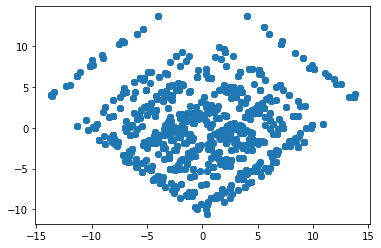

In [51]:
#plt.scatter(train_pca[:,0], train_pca[:,1]);

In [15]:
feats= feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)

In [16]:
X_train_best_log = X_train_scaled[feats]
X_test_best_log = X_test_scaled[feats]

# Logistic Regression

Penalty: l2
Solver: newton-cg
Mean Cross-Val Score: 0.5301290259036738
Train Mean Accuracy: 0.5469845722300141
Test Mean Accuracy: 0.5280898876404494
Recall Score: 0.7282608695652174
Precision Score: 0.5317460317460317
F1 Score: 0.6146788990825688


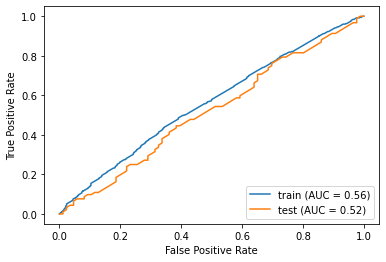

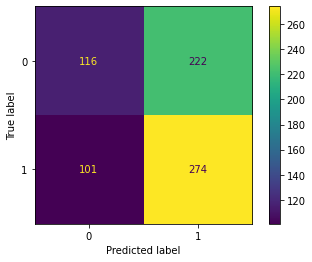

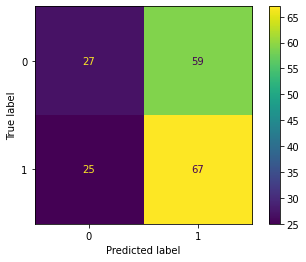

In [17]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [18]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy,count

In [19]:
new_acc(probabilities)

(0.5, 9)

### Home_win, zero imp
***

In [36]:
feats= feature_select(zero_imp_train,y_train,LogisticRegression,min_features=10)

In [37]:
X_train_best_log = zero_imp_train[feats]
X_test_best_log = zero_imp_test[feats]

Penalty: l1
Solver: saga
Mean Cross-Val Score: 0.6002477620805227
Train Mean Accuracy: 0.608480856319473
Test Mean Accuracy: 0.6363636363636364
Recall Score: 0.5454545454545454
Precision Score: 0.6666666666666666
F1 Score: 0.6


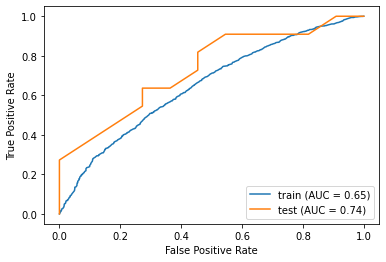

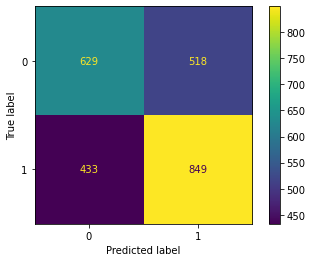

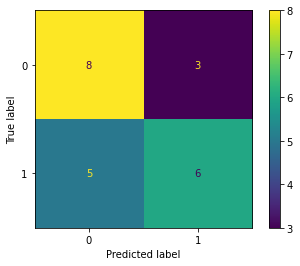

In [38]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [39]:
new_acc(probabilities)

0.65

### Explore thresehold movement and other things

In [94]:
logregs=LogisticRegression()
logregs.fit(X_train_scaled,y_train)

LogisticRegression()

In [95]:
logregs.predict_proba(X_test_scaled)[:,1] >= 0.6

array([ True,  True,  True,  True, False,  True, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False])

In [47]:
decisions = (logregs.predict_proba(X_test_scaled) >= .6).astype(int)
len(decisions)

54

In [97]:
today_winners = np.where(y_test!= predictions,'Away','Home')

In [101]:
today_winners

array(['Home', 'Home', 'Home', 'Home', 'Away', 'Home', 'Home', 'Away',
       'Away', 'Away', 'Home', 'Home', 'Away', 'Home', 'Home', 'Home',
       'Away', 'Home', 'Away', 'Away', 'Home', 'Away', 'Home'],
      dtype='<U4')

7 out of 9 playoff series correctly predicted

# KNN

### Home win KNN

Number of Neighbors: 13
Metric: manhattan
Weights: uniform
Mean Cross-Val Score: 0.5006796020880528
Train Mean Accuracy: 0.5511921458625526
Test Mean Accuracy: 0.5393258426966292
Recall Score: 0.6847826086956522
Precision Score: 0.5431034482758621
F1 score: 0.6057692307692307


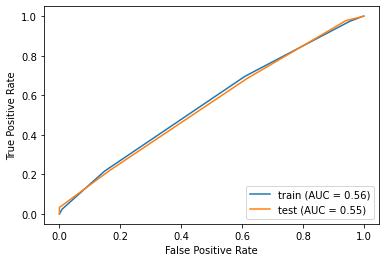

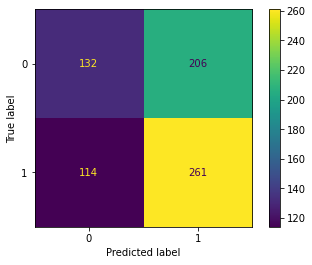

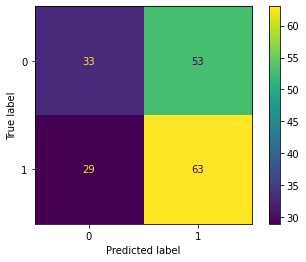

In [20]:
prediction,probabilities=knn(X_train_scaled,X_test_scaled,y_train,y_test)

In [21]:
new_acc(probabilities)

(0.6097560975609756, 25)

# Decision Tree

In [24]:
dfeats= feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)
X_train_best_tree = X_train_scaled[dfeats]
X_test_best_tree = X_test_scaled[dfeats]

### Dtree Home Win

Max Depth: 3
Min Sample Split: 2
criterion: entropy
Mean Cross-Val Score: 0.5784319714903907
Train Mean Accuracy: 0.608480856319473
Test Mean Accuracy: 0.5909090909090909
Recall Score: 0.5454545454545454
Precision Score: 0.6
F1 score: 0.5714285714285713


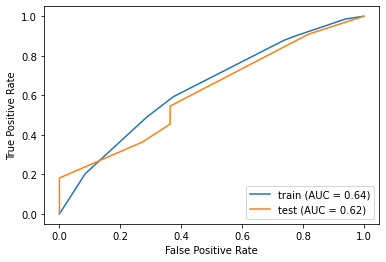

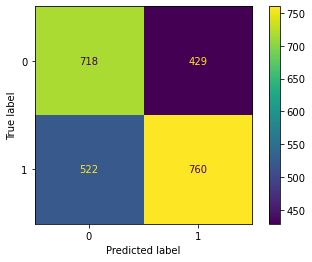

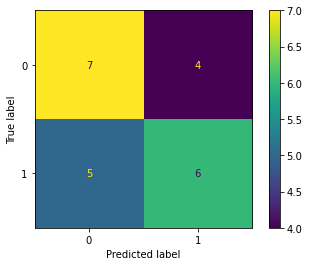

In [25]:
predictions,probabilities=dtree(X_train_best_tree,X_test_best_tree,y_train,y_test)

In [27]:
new_acc(probabilities)

0.5833333333333334

# Random Forest

In [22]:
def random_forest(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'n_estimators': [75,90,100,110,115,125,150,500],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Random Forest model for GridSearch
    grid_rf = RandomForestClassifier()
    grid_rf.fit(X_train,y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_rf, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    rf_params = gs.best_params_
    
    # Use best # of trees from best_params
    rf_n_estimators = rf_params['n_estimators']
    print(f'Number of Trees: {rf_n_estimators}')
    
    # Use best criterion from best_params
    rf_criterion = rf_params['criterion']
    print(f'criterion: {rf_criterion}')
    
    # Instantiate & fit Random Forest model
    rforest = RandomForestClassifier(n_estimators=rf_n_estimators, criterion=rf_criterion,
                                    random_state=42)
    rforest.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = rforest.predict(X_test)
    y_prob = rforest.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(rforest, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = rforest.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = rforest.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(rforest, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(rforest, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(rforest, X_train, y_train)
    plot_confusion_matrix(rforest, X_test, y_test);
    
    return y_pred,y_prob


In [23]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 500
criterion: gini
Mean Cross-Val Score: 0.461439968482222
Train Mean Accuracy: 0.5680224403927069
Test Mean Accuracy: 0.5617977528089888
Recall Score: 0.6956521739130435
Precision Score: 0.5614035087719298
F1 score: 0.6213592233009708


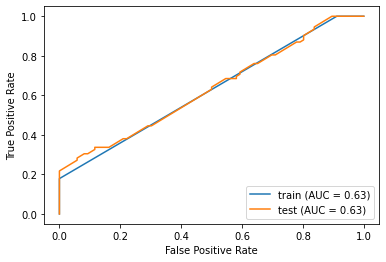

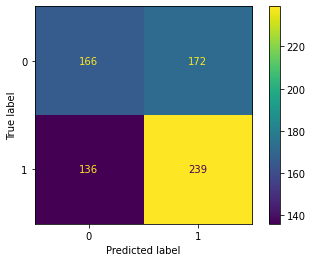

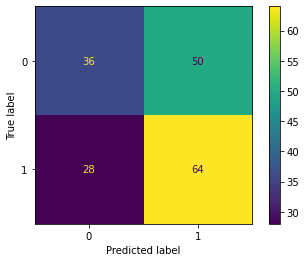

In [24]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [25]:
new_acc(probabilities)

(1.0, 28)

# Bagging Classifier

Dec Tree Max Depth: 2
Dec Tree Criterion: gini
Bagging Max Samples: 3
Bag Max Features: 2
# of Base Estimators: 500
Mean Cross-Val Score: 0.5891468329727207
Train Mean Accuracy Score: 0.5673116508851379
Test Mean Accuracy Score: 0.5
Recall Score: 1.0
Precision Score: 0.5
F1 score: 0.6666666666666666


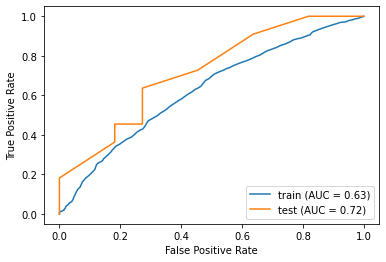

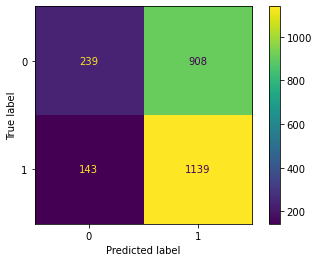

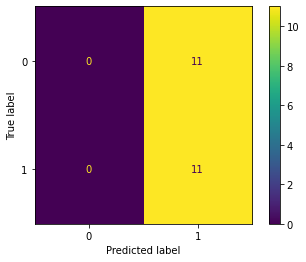

In [53]:
bagged(X_train_scaled,X_test_scaled,y_train,y_test)

# XGBoost

In [56]:
xfeats= feature_select(zero_imp_train,y_train,XGBClassifier,min_features=10)
X_train_best_x = zero_imp_train[xfeats]
X_test_best_x = zero_imp_test[xfeats]

XGBoost Learning Rate: 0.05
XGBoost Max Depth: 3
XGBoost Min Child Weight: 1
XGBoost Subsample: 0.7
XGBoost Estimators: 100
Stopped in Round: 15
Mean Cross-Val Score: 0.5409766238174027
Train Mean Accuracy Score: 0.6990531082750103
Test Mean Accuracy Score: 0.6363636363636364
Recall Score: 0.6363636363636364
Precision Score: 0.6363636363636364
F1 score: 0.6363636363636364


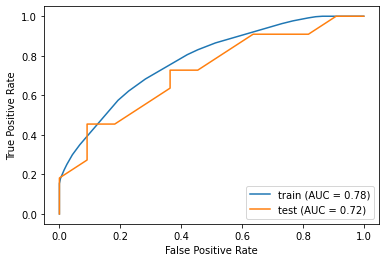

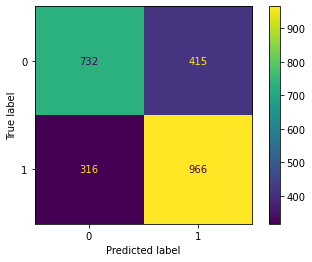

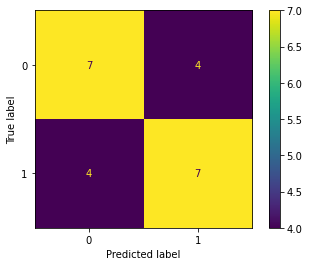

In [57]:
xgboost(X_train_best_x, X_test_best_x, y_train, y_test, cv=5)